# Data Description

Dataset consists customer information for a customer churn prediction problem. It includes the following columns:

**CustomerID**: Unique identifier for each customer.


**Name**: Name of the customer.


**Age: Age of the customer.**


**Gender**: Gender of the customer (Male or Female).


**Location**: Location where the customer is based, with options including Houston, Los Angeles, Miami, Chicago, and New York.


**Subscription_Length_Months**: The number of months the customer has been subscribed.


**Monthly_Bill**: Monthly bill amount for the customer.


**Total_Usage_GB**: Total usage in gigabytes.


**Churn**: A binary indicator (1 or 0) representing whether the customer has churned (1) or not (0).

In [24]:
# importing required libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Exploratory Data Analysis (EDA)

In [39]:
df.shape

(100000, 9)

In [40]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


**All variables has correct data type.**

In [42]:
df.isna().sum()/len(df)*100

CustomerID                    0.0
Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

**There is no null value in any of variable.**

In [43]:
df.duplicated().sum()

0

**There is no duplicate record in datset.**

In [44]:
# Statistical summary of numerical variables

df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


### `Age` 

* **The average age of the customers is approximately 44 years.**


* **The ages of the people varies widely. The youngest person is 18 years old and the oldest person is 70 years old.**


* **The majority of customers fall within the range of 31 to 57 years.**


* **The spread of ages is represented by a standard deviation of about 15 years.**


### `Subscription_Length_Months` 

* **On average, customers have a subscription length of around 12.5 months.**


* **Subscription lengths vary between 1 and 24 months.**


* **The majority of customers have subscription lengths ranging from 6 to 19 months.**


* **The standard deviation is approximately 6.9 months, indicating some variation in subscription lengths.**


### `Monthly_Bill`

* **Customers pay an average monthly bill of roughly $65.**


* **Monthly bills range from 30 Dollar (minimum) to 100 Dollar (maximum).**


* **The majority of customers pay between approximately 47.50 Dollar to 82.64 Dollar per month.**


* **Monthly bill amounts have a standard deviation of about $20.23, showing some variability.**


### `Total_Usage_GB`

* **The average total usage of customers is about 274.4 GB.**


* **Total usage varies between 50 GB (minimum) and 500 GB (maximum).**


* **Most customers have total usage between 161 GB and 387 GB.**


* **Total usage has a standard deviation of approximately 130.46 GB, indicating a significant range.**

### `Churn`

* **About half of the customers have churned (Churn value = 1), while the other half haven't (Churn value = 0).**


* **This is represented by a mean churn rate of approximately 0.5.**


* **Churn values are binary (0 or 1), indicating whether a customer has churned or not.**


* **Churn rate is evenly distributed due to a mean close to 0.5.**

In [47]:
# Statistical summary of categoical variables

df.describe(include=['object'])

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [48]:
df['Gender'].value_counts()

Gender
Female    50216
Male      49784
Name: count, dtype: int64

In [49]:
df['Location'].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

### `Gender`

* **The dataset includes information about two unique genders.**


* **The most common gender is "Female," which appears 50,216 times.**


* **The frequency of females in the dataset is greater than that Male.**


### `Location`

* **The dataset contains information about five unique locations[Houston, Los Angeles, Miami, Chicago, New York].**


* **The most frequent location is "Houston," occurring 20,157 times.**

In [50]:
df.drop(columns=['CustomerID', 'Name'],axis=1,inplace=True)

In [52]:
# Checking correlation between numerical variables
df = df.select_dtypes(include=['float64', 'int64'])


df.corr()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002328,-0.000211,-0.002842,1.000000


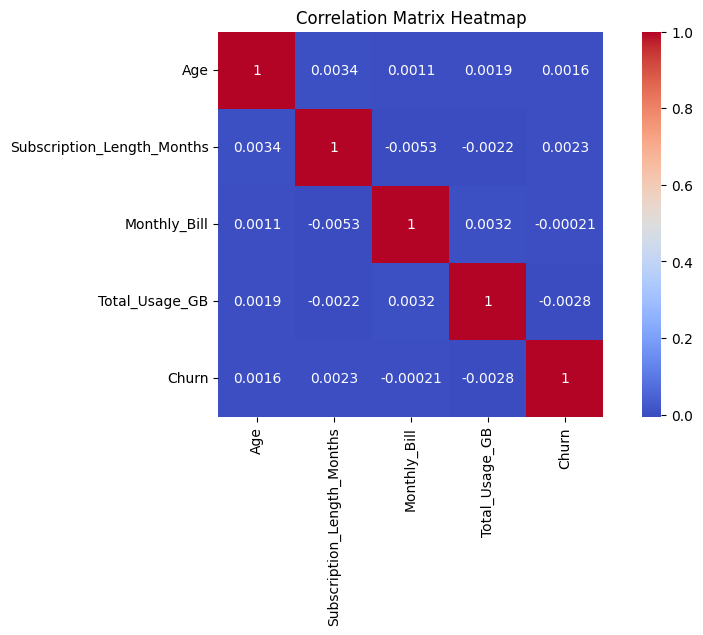

In [53]:
corr_matrix = df.corr()
plt.figure(figsize=(10,5)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### `Age and Subscription Length` 

* **Age and subscription length have a very low positive correlation of approximately 0.0034.**


* **This indicates that there is almost no linear relationship between a customer's age and the length of their subscription. It means customer's age does not have a strong impact on how long they stay subscribed.**


### `Age and Monthly Bill`

* **Age and monthly bill amount have an extremely low positive correlation of about 0.0011.**


* **This suggests that there is almost no linear relationship between a customer's age and the amount they are billed monthly. It means customer's age does not have a strong impact on the amount they are billed monthly.**


### `Age and Total Usage`

* **Age and total usage in GB have a very low positive correlation of around 0.0019.**


* **This implies that there is almost no linear relationship between a customer's age and the amount of data they use. it means  customer's age does not have a strong impact on how much data they use.**


### `Age and Churn`

* **Age and churn have a very low positive correlation of about 0.0016.**


* **This means that there is almost no linear relationship between a customer's age and their likelihood to churn means customer's age is not a good predictor of whether they will churn.**


### `Subscription Length and Monthly Bill`

* **Subscription length and monthly bill amount have a very low negative correlation of approximately -0.0053.**


* **There is a weak relationship between how long a customer has been subscribed and how much they pay each month.**


### `Subscription Length and Total Usage`

* **Subscription length and total usage have a very low negative correlation of around -0.0022.**


* **This suggests that changes in subscription length are not strongly associated with changes in total data usage.**


### `Subscription Length and Churn`

* **Subscription length and churn have a very low positive correlation of about 0.0023.** 


* **There is almost no linear relationship between subscription length and churn behavior means length of a subscription does not have a strong impact on whether a customer churns.**


### `Monthly Bill and Total Usage`

* **Monthly bill amount and total usage have an extremely low positive correlation of about 0.0032.**


* **This indicates that there is almost no linear relationship between a customer's monthly bill and their total data usage. It means the amount of data a customer uses does not have a strong impact on their monthly bill.**

### `Monthly Bill and Churn`

* **Monthly bill amount and churn have an extremely low negative correlation of approximately -0.0002.**


* **This suggests that there is hardly any linear relationship between monthly bill amount and churn behavior.** 


* **The amount a customer is billed monthly does not have a strong impact on whether they churn.**

### `Total Usage and Churn`

* **Total usage and churn have a very low negative correlation of about -0.0028.**


* **There is almost no linear relationship between a customer's data usage and their likelihood to churn.**


* **The amount of data a customer uses does not have a strong impact on whether they churn.**

In [54]:
#df.drop(columns=['CustomerID', 'Name'],axis=1,inplace=True)

KeyError: "['CustomerID', 'Name'] not found in axis"

In [55]:
df.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

**Removed ['CustomerID' & 'Name'] variables becuase they are irrelevant for analysis. Now dataset left with 6 variables**

In [56]:
# Check for typo's & suspicious values and rechecking dataset 

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes

print('-'*50)
print("Missing values:")
print(missing_values)
print()

x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

print('-'*50)
print("\nData types:")
print(data_types)
print()

Unique values in 'Age': [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]

Unique values in 'Subscription_Length_Months': [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]

Unique values in 'Monthly_Bill': [73.36 48.76 85.47 ... 75.21 41.98 83.55]

Unique values in 'Total_Usage_GB': [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 257 196 365 419 111 192 244 287 395 213 109 286 283 230 491 274
 335 462 407 126 199 351 261 496 480 400 303 197 181 474 348 112 457

**The dataset has been cleaned and no suspicious values or typos have been found.**

# `Outliers Treatment`

It is important to find and remove unusual or extreme data points, also known as outliers. Outliers can affect the model's understanding of the data and lead to wrong predictions. By identifying and removing outliers, the model becomes more accurate and reliable, and can better capture the actual patterns in the data.

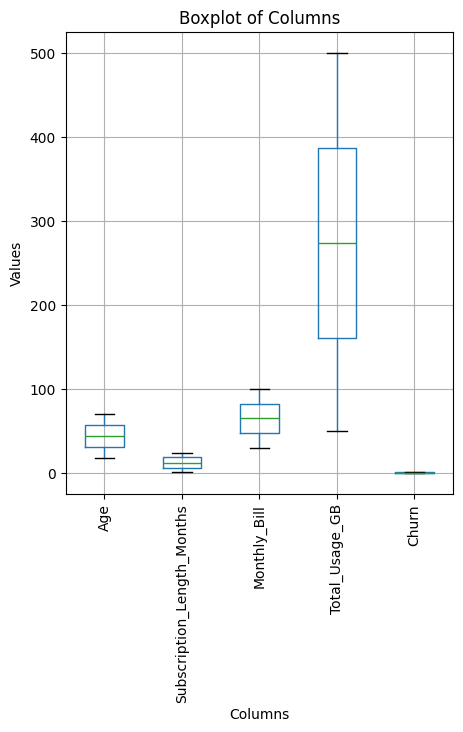

In [57]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

**There is no outlier present in any of the variable.**

In [58]:
# Make a copy of cleaned data

df_cleaned = df.copy()

# `Feature Encoding`

Feature encoding techniques converts categorical data (like labels) into numbers that algorithms understand. This is essential because algorithms work with numbers, ensuring valuable info from categories isn't lost.

In [59]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

**There are two variables, which needs to be encode.**

In [61]:
df = pd.get_dummies(df, columns=['Gender', 'Location'], drop_first = True)

KeyError: "None of [Index(['Gender', 'Location'], dtype='object')] are in the [columns]"

In [62]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,17,73.36,236,0
1,62,1,48.76,172,0
2,24,5,85.47,460,0
3,36,3,97.94,297,1
4,46,19,58.14,266,0


**Here I apply One Hot Encoding becuase both variables have less number of categories.**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Subscription_Length_Months  100000 non-null  int64  
 2   Monthly_Bill                100000 non-null  float64
 3   Total_Usage_GB              100000 non-null  int64  
 4   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.8 MB


**Data types of all variables is fine.**

# `Checking Distribution of data`

* In machine learning, it is important to check how the data is spread across different values. This is called the distribution of data.


* If the data is skewed, meaning that there are more data points in one area than others, it can affect the performance of our models. For example, if the data is skewed towards the majority class, the model might perform well on the majority class but poorly on the minority class.


* By understanding the data distribution, we can choose appropriate strategies to handle imbalances, outliers, or other issues. This will ensure that our model works well across all scenarios and accurately represents the underlying patterns in the data.

In [64]:
df.shape

(100000, 5)

In [65]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 100000
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 17


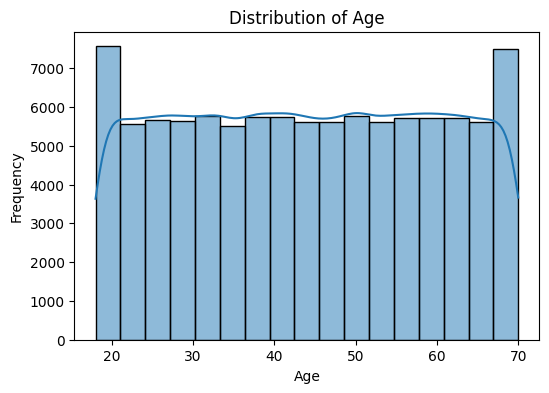

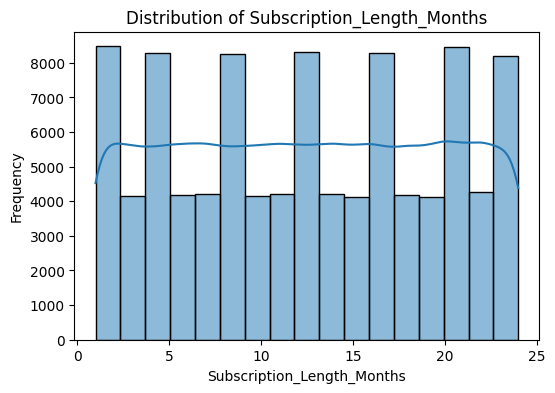

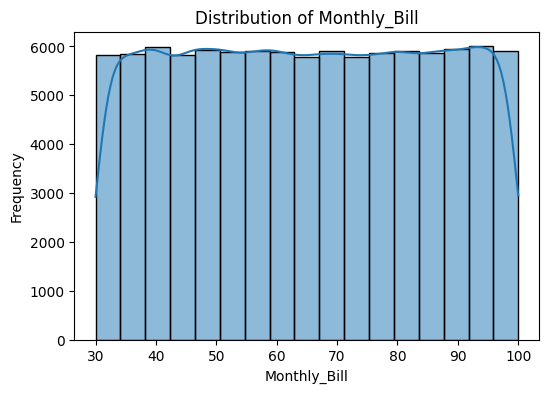

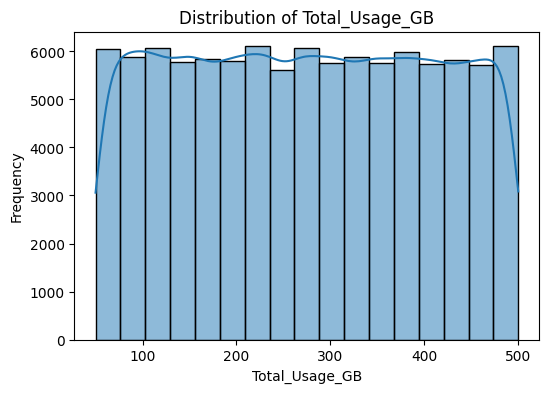

In [66]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=17, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [ ]:
# check skewness of all continuous variables
df[continuous_vars].skew()

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
dtype: float64

**All variables are approx normally distributed.**

# `Check colinearity between variables`

* In machine learning, it is important to check if there are variables that are highly correlated with each other. If there are, then we should remove one of them to improve the stability and interpretability of the model.


* Highly correlated variables are redundant, meaning that they provide the same information. This can cause the model to give too much importance to one variable, leading to overfitting. Overfitting is when the model learns the training data too well and does not generalize well to new data.


* By removing highly correlated variables, we can make the model focus on distinct and meaningful information. This makes the model more reliable and understandable. It also helps to prevent multicollinearity, which is a problem that can distort the model's predictions and insights.

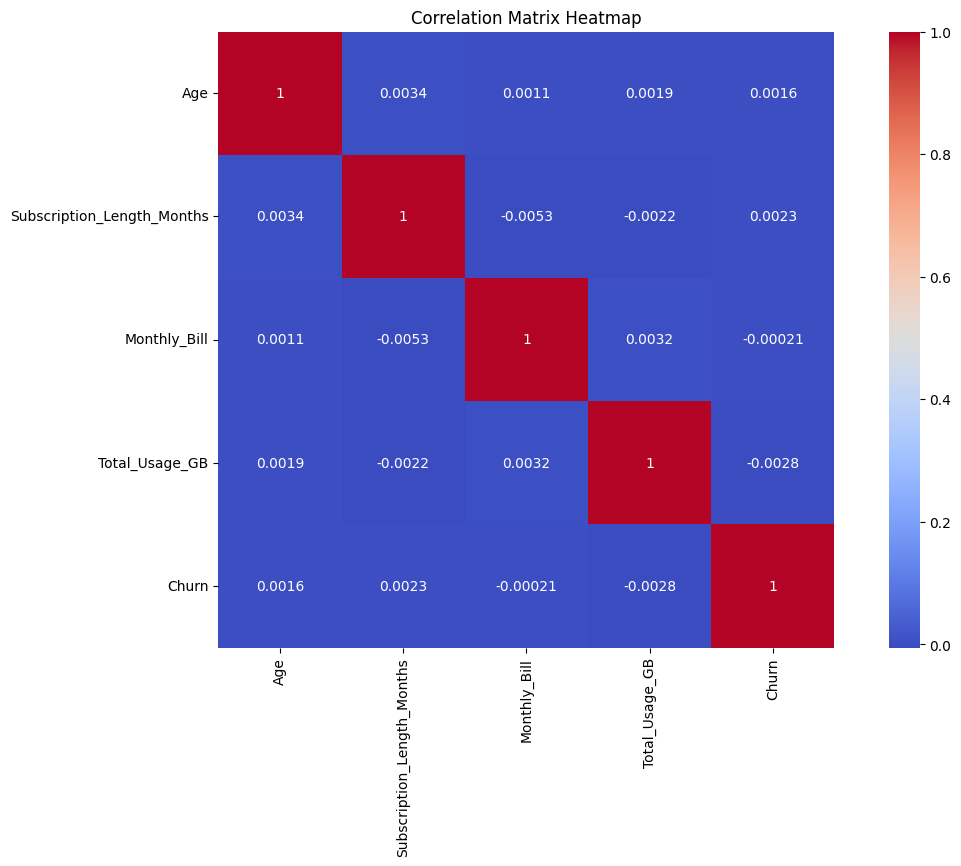

In [67]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**No pair of variable is highly corrleated.**

# `Diving data into train and test set` 

In [68]:
x = df.drop("Churn",axis=1)
y = df['Churn']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Take 70% data for training and 30% for testing.**

In [70]:
X_train.shape, y_train.shape

((70000, 4), (70000,))

In [71]:
X_test.shape, y_test.shape

((30000, 4), (30000,))

# `Feature Scaling` 

* In machine learning, it is important to make sure that all features are on the same scale. This is called feature scaling.


* Feature scaling is important because it ensures that no single feature dominates the learning process. This is because many machine learning algorithms use distance-based calculations, and if features are on different scales, those with larger values could disproportionately influence the results.


* Feature scaling also helps to improve the convergence of gradient-based optimization algorithms, which can lead to faster training.


* By scaling features, we create a balanced playing field for each feature. This allows the algorithm to make fair and accurate comparisons, which can lead to better model performance.

In [72]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,17,73.36,236,0
1,62,1,48.76,172,0
2,24,5,85.47,460,0
3,36,3,97.94,297,1
4,46,19,58.14,266,0


In [73]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 1).any() or (df[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


**These four columns need scaling, ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']. I decide to use MinMax Scaler becuase majority of variables in binary.**

In [75]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

* We use the .fit_transform() method on training data to calculate the scaling parameters (such as mean and standard deviation) and then apply the transformation. This ensures that the training data is scaled properly.


* However, we use the .transform() method on test data because we do not want to change the scaling parameters based on the test data. Instead, we want to apply the same scaling that was learned from the training data. This maintains the consistency of scaling between training and testing data, which is more realistic and prevents the model from learning information from the test data during training.

In [76]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
76513,0.134615,0.521739,0.973425,0.928889
60406,0.692308,0.043478,0.598657,0.740000
27322,0.269231,0.826087,0.509358,0.837778
53699,0.826923,0.478261,0.760109,0.031111
65412,1.000000,0.173913,0.170453,0.108889


In [77]:
X_test.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
75721,0.576923,0.434783,0.835548,0.982222
80184,0.596154,0.521739,0.151593,0.828889
19864,0.250000,0.173913,0.043006,0.502222
76699,0.673077,0.130435,0.923846,0.642222
92991,0.096154,1.000000,0.745964,0.564444


# `Check for the class imbalance`

* In machine learning, it is important to check if the data is balanced or not. This is called class imbalance.


* Class imbalance happens when there are more data points in one class than in the other class. This can affect the performance of the model. For example, if the majority class has more data points than the minority class, the model might perform well on the majority class but poorly on the minority class.


* By identifying class imbalance, we can employ strategies to address the issue. These strategies include resampling, adjusting class weights, or using different evaluation metrics. This will help us create a fair and accurate model that performs well across all classes


In [78]:
class_counts = df['Churn'].value_counts()
class_counts

Churn
0    50221
1    49779
Name: count, dtype: int64

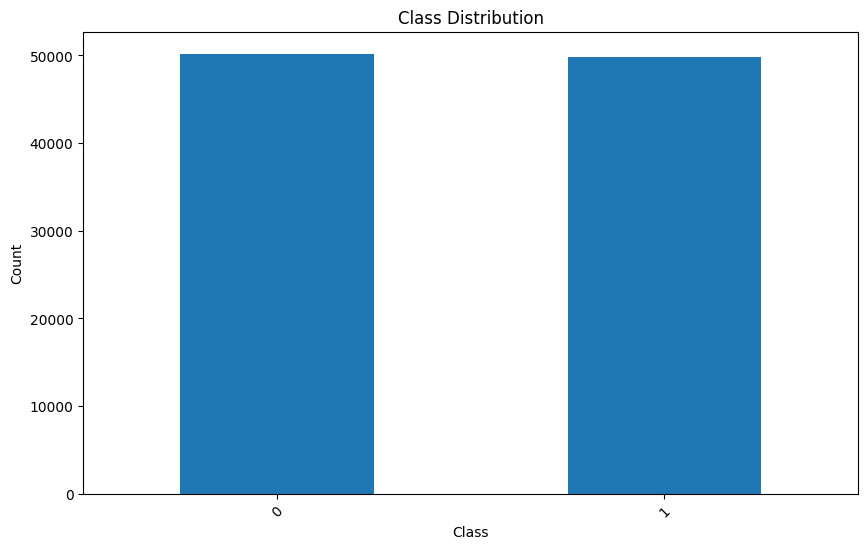

In [79]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**The churn variables are almost evenly distributed, which means that there is no problem of class imbalance.**

# `Feature Selection using Random Forest Feature Importance Method`

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.363033
1,Total_Usage_GB,0.300354
2,Age,0.188628
3,Subscription_Length_Months,0.147986


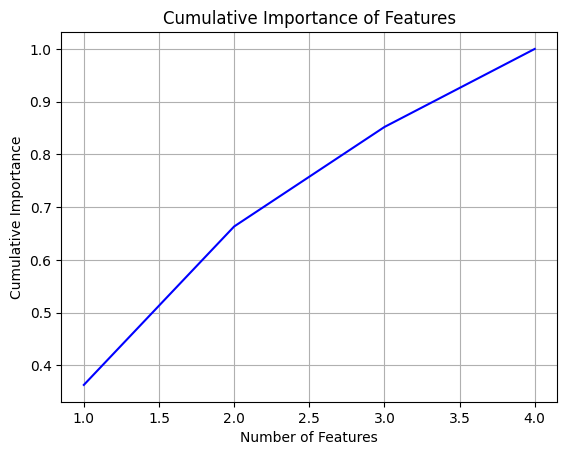

In [82]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

**The graph shows that only 4 variables are important for the analysis. These variables are:**

* **Monthly bill**


* **Total usage in GB**


* **Age**


* **Subscription length in months**


* **These 4 variables together account for approximately 94% of the importance for the analysis. This means that they are the most important variables to consider when trying to predict customer churn.**


* **Here, I will use all the variables for analysis because there are not many variables. If the model does not perform well or overfits, I will remove variables and build a model on the features that contribute more to the model.**

# `Check multi-colinearity between variables`

* In machine learning, it is important to check if there are variables that are highly correlated with each other. This is called multicollinearity.


* Multicollinearity can cause problems with the model, such as making it unstable and difficult to interpret. This is because correlated variables are redundant, meaning that they provide the same information. This can cause the model to give too much importance to one variable, leading to overfitting.


* By identifying and addressing multicollinearity, we can make the model more reliable and interpretable. This improves the model's predictive power and makes it easier to understand how the variables affect the target variable.

In [87]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 14.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 27.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [88]:
#checking multicolinearity of X_train_resampled

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
2,Monthly_Bill,3.055120
3,Total_Usage_GB,3.043256
0,Age,3.002887
1,Subscription_Length_Months,2.922424


**The training data does not contain multicollinearity because all of the variables have a VIF value less than 5.**

# `Model Building: Machine Learning Algorithms`

In [90]:
pip install xgboost

SyntaxError: invalid syntax (661035427.py, line 1)

In [91]:
#importing algorithms, metrics and time

import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [92]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

/Users/prasenjeetsmac/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503400,0.503356,0.503400,0.496215,2.129534
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.422559
2,KNeighborsClassifier,0.686600,0.686602,0.686600,0.686596,1.043395
3,GaussianNB,0.501486,0.501325,0.501486,0.493915,0.050936
4,AdaBoostClassifier,0.513000,0.512984,0.513000,0.512904,1.044270
5,GradientBoostingClassifier,0.538557,0.538573,0.538557,0.538399,3.740535
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,2.114240
7,XGBClassifier,0.660357,0.660365,0.660357,0.660347,0.229431
8,SVC,0.517714,0.517997,0.517714,0.514748,220.828473


* **Decision Tree, Random Forest, and Gradient Boosting achieved perfect accuracy on the training data, suggesting potential overfitting.**


* **Logistic Regression, GaussianNB, and AdaBoost have relatively low accuracy and F1-score.**


* **KNeighborsClassifier and XGBClassifier have moderate accuracy and F1-score.**


* **SVC has moderate accuracy but high building time.**

In [93]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.498600,0.497328,0.498600,0.491694
1,DecisionTreeClassifier,0.500100,0.500078,0.500100,0.500087
2,KNeighborsClassifier,0.497900,0.497918,0.497900,0.497907
3,GaussianNB,0.499333,0.498084,0.499333,0.492268
4,AdaBoostClassifier,0.498467,0.498457,0.498467,0.498461
5,GradientBoostingClassifier,0.502000,0.501906,0.502000,0.501909
6,RandomForestClassifier,0.503567,0.503378,0.503567,0.503286
7,XGBClassifier,0.500933,0.500908,0.500933,0.500918
8,SVC,0.501733,0.501010,0.501733,0.498641


* **Most algorithms have mediocre performance on the test data, with accuracy close to random guessing (around 0.5).**


* **Decision Tree, Random Forest, and Gradient Boosting also show subpar results, indicating overfitting.**


* **No algorithm is performing well, so I decided to take only 4 variables that contribute more to the target variable and build the model again.**


* **I removed the age and location variables because they are not good predictors of whether a customer will churn or not.**

In [94]:
X_train = X_train[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

X_test = X_test[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

In [95]:
print('X_train columns:', X_train.columns)
print('-'*120)
print('X_test columns:', X_test.columns)

X_train columns: Index(['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
X_test columns: Index(['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months'], dtype='object')


In [96]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

/Users/prasenjeetsmac/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503400,0.503356,0.503400,0.496215,2.232962
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.427965
2,KNeighborsClassifier,0.686600,0.686602,0.686600,0.686596,1.050024
3,GaussianNB,0.501486,0.501325,0.501486,0.493915,0.053642
4,AdaBoostClassifier,0.513000,0.512984,0.513000,0.512904,0.984227
5,GradientBoostingClassifier,0.538557,0.538573,0.538557,0.538399,3.744292
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,2.256945
7,XGBClassifier,0.662214,0.662220,0.662214,0.662205,0.228406
8,SVC,0.517700,0.517982,0.517700,0.514735,223.008885


* **Decision Tree and Random Forest still achieve perfect accuracy, likely overfitting again.**


* **Logistic Regression, GaussianNB, and AdaBoost have improved slightly.**


* **KNeighborsClassifier and XGBClassifier remain moderate.**


* **SVC still has high building time.**

In [ ]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.498433,0.497171,0.498433,0.491696
1,DecisionTreeClassifier,0.500400,0.500360,0.500400,0.500372
2,KNeighborsClassifier,0.497900,0.497918,0.497900,0.497907
3,GaussianNB,0.499333,0.498084,0.499333,0.492268
4,AdaBoostClassifier,0.498467,0.498457,0.498467,0.498461
5,GradientBoostingClassifier,0.502000,0.501906,0.502000,0.501909
6,RandomForestClassifier,0.505767,0.505583,0.505767,0.505489
7,XGBClassifier,0.497667,0.497633,0.497667,0.497644
8,SVC,0.501733,0.501010,0.501733,0.498641


* **Decision Tree and Random Forest overfits.**


* **No algorithm is performing well, so I decided to build model using neural networks.**


* **If the neural network does not provide better results than machine learning algorithms, then I will build ensembles of random forests because random forests achieve perfect scores in all metrics in the training data. Decision trees also achieve perfect scores in all metrics in the training data, but I have already tried and tested multiple ensembles that use decision trees. Therefore, I will now build ensembles using random forests**.

# `Model Building: Neural Network`

In [98]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.1/236.1 MB 6.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 27.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 24.9 MB/s eta 0:00:0

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import recall_score

/Users/prasenjeetsmac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## `Defining Callbacks for Early Stopping and Model Checkpoint`

* Best model will save to pwd (present working directory) as 'Churn Classifier.h5'


* Early stopping is a regularization technique that stops the training of a neural network before it reaches the maximum number of epochs or iterations. It is important because it helps to prevent overfitting.


* Early stopping is a technique that stops the training of a model when the validation loss stops improving. If you set restore_best_weights to False, the model will be saved at the end of the training, even if the validation loss has not improved. This could result in the model being saved at a point where it is overfitting the training data. By setting restore_best_weights to True, the model will be saved at the epoch with the best validation loss. This ensures that the model that is saved is the one that is most likely to generalize well to new data.


* When you set restore_best_weights=True in the EarlyStopping callback, it ensures that the model's weights are restored to the state they were in at the epoch with the lowest validation loss. This means that when you evaluate the model after training, the evaluation metrics, including accuracy and other metrics, are computed based on the weights of the model that performed the best on the validation data.

In [100]:
# Define the EarlyStopping and ModelCheckpoint callbacks

early_stopping = EarlyStopping(
    monitor='val_loss',        # The metric to monitor. This is usually the validation loss.
    min_delta=0.001,           # The minimum amount of improvement required to consider the model to have improved.
    patience=10,               # The number of epochs to wait without improvement before stopping the training.
    verbose=1,                 # Print output
    mode='auto',               # Consider mode of the metric as min or max.
    restore_best_weights=True  # Whether to restore the model weights at the epoch with the best validation loss.
)

In [101]:
#checkpoint = ModelCheckpoint('ChurnClassifier.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=ChurnClassifier.h5

In [102]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('ChurnClassifier.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


## `Build Neural Network Architectures & Fit Model on Training Data`

### `Architecture I`

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
363/383 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.5017 - loss: 0.6936
Epoch 1: val_loss improved from inf to 0.69340, saving model to ChurnClassifier.keras
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.5017 - loss: 0.6936 - val_accuracy: 0.4984 - val_loss: 0.6934
Epoch 2/100
357/383 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.5039 - loss: 0.6934
Epoch 2: val_loss improved from 0.69340 to 0.69329, saving model to ChurnClassifier.keras
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.5038 - loss: 0.6934 - val_accuracy: 0.5017 - val_loss: 0.6933
Epoch 3/100
363/383 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.4992 - loss: 0.6934
Epoch 3: val_loss did not improve from 0.69329
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.4993 - loss: 0.6934 - val_accuracy: 0.5036 - val_loss: 0.6934
Epoch 4/100
361/383 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.5058 - loss: 0.6931
Epoch 4: val_loss improved from 0.69329 to 0.69317, saving model

### `Architecture II`

In [105]:
model = Sequential()

# layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Users/prasenjeetsmac/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
374/383 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.4989 - loss: 0.6932
Epoch 1: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 2/100
360/383 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.4981 - loss: 0.6932
Epoch 2: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6933
Epoch 3/100
369/383 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.5030 - loss: 0.6931
Epoch 3: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.5030 - loss: 0.6931 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 4/100
356/383 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5046 - loss: 0.6931
Epoch 4: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.4967

### `Architecture III`

In [107]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/Users/prasenjeetsmac/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
267/383 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.4975 - loss: 0.6932
Epoch 1: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 2/100
288/383 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.4985 - loss: 0.6932
Epoch 2: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 3/100
376/383 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.4994 - loss: 0.6932
Epoch 3: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6933
Epoch 4/100
266/383 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.5052 - loss: 0.6931
Epoch 4: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5043 - loss: 0.6931 - val_accuracy: 0.4967

### `Architecture IV`

In [109]:
model = Sequential()

# Input layer with BatchNormalization and Activation (ReLU)
model.add(Dense(10, input_dim=4, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# First hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))  # 20% dropout

# Second hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(5, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))  # 10% dropout

# Output layer with Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

/Users/prasenjeetsmac/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**`Batch Normalization`** is used before the activation function in neural networks to enhance training stability and speed up convergence. By normalizing inputs within each batch, it maintains stable distribution and prevents extreme activations, leading to faster learning and better performance.


**`"He_normal"`** is a weight initialization technique in neural networks. It sets initial weights to encourage effective learning, especially with ReLU activation. It helps prevent vanishing gradient and works well in deep networks.

In [110]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
299/383 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5082 - loss: 0.7535
Epoch 1: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.5077 - loss: 0.7475 - val_accuracy: 0.4947 - val_loss: 0.6975
Epoch 2/100
307/383 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5063 - loss: 0.7019
Epoch 2: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.5061 - loss: 0.7017 - val_accuracy: 0.4937 - val_loss: 0.6954
Epoch 3/100
317/383 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5042 - loss: 0.6969
Epoch 3: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.5045 - loss: 0.6968 - val_accuracy: 0.4972 - val_loss: 0.6943
Epoch 4/100
374/383 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5051 - loss: 0.6956
Epoch 4: val_loss did not improve from 0.69312
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.5051 - loss: 0.6955 - val_accuracy: 0.4982

### `Architecture V`

In [111]:
# Build the neural network
model = Sequential([
    Dense(64, activation = 'relu', input_dim = 4),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

/Users/prasenjeetsmac/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
349/438 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.4983 - loss: 0.6957
Epoch 1: val_loss did not improve from 0.69312
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.4980 - loss: 0.6955 - val_accuracy: 0.4953 - val_loss: 0.6934
Epoch 2/100
362/438 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.4931 - loss: 0.6936
Epoch 2: val_loss did not improve from 0.69312
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.4939 - loss: 0.6935 - val_accuracy: 0.4944 - val_loss: 0.6933
Epoch 3/100
352/438 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5007 - loss: 0.6932
Epoch 3: val_loss did not improve from 0.69312
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6931
Epoch 4/100
364/438 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.5044 - loss: 0.6932
Epoch 4: val_loss did not improve from 0.69312
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5044 - loss: 0.6932 - val_accuracy: 0.4939

* **I have tried multiple ANN architectures, but none of them have provided good results.**

## `Ensembles of Random Forest`

In [116]:
import time
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize base estimator (Random Forest)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize models using the correct parameter name for AdaBoost
adaboost_model = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# List of models to iterate over
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model, model_name in zip([adaboost_model, gradient_boost_model, xgboost_model], models):
    start_time = time.time()  # Track training time
    model.fit(X_train, y_train)  # Train the model
    end_time = time.time()

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time = end_time - start_time

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics to the results dictionaries
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display the DataFrames
print("Training Data Results:")
print(results_train_df)

print("\nTest Data Results:")
print(results_test_df)


/Users/prasenjeetsmac/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Data Results:
                   Accuracy  Precision    Recall  F1 Score  Building Time
AdaBoost           1.000000   1.000000  1.000000  1.000000      11.828259
Gradient Boosting  0.530471   0.530660  0.530471  0.529365       1.809910
XGBoost            0.622186   0.622185  0.622186  0.622182       0.109503

Test Data Results:
                   Accuracy  Precision    Recall  F1 Score  Building Time
AdaBoost           0.501700   0.501509  0.501700  0.501422      11.828259
Gradient Boosting  0.500767   0.500344  0.500767  0.499672       1.809910
XGBoost            0.499500   0.499493  0.499500  0.499496       0.109503


In [117]:
print("\nTest Data Results:")
results_test_df


Test Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,0.501700,0.501509,0.501700,0.501422,11.828259
Gradient Boosting,0.500767,0.500344,0.500767,0.499672,1.809910
XGBoost,0.499500,0.499493,0.499500,0.499496,0.109503


* **The performance of ensembles can vary, but they are usually not much better than individual algorithms.**


* **None of the ensembles provided the desired results. So, I decided to trial and error using a different approach.**

# `Model Building: PCA`

In [118]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'Location'], drop_first = True)

KeyError: "None of [Index(['Gender', 'Location'], dtype='object')] are in the [columns]"

In [119]:
x = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [122]:
# Convert scaled numpy arrays back to DataFrames

X_train = pd.DataFrame(X_train)

X_test = pd.DataFrame(X_test)

In [123]:
X_train.head()

,0,1,2,3
0,-1.243589,0.074501,1.632642,1.481066
1,0.654284,-1.515230,0.336478,0.829765
2,-0.785482,1.086147,0.027632,1.166909
3,1.112391,-0.070020,0.894871,-1.614532
4,1.701386,-1.081667,-1.144499,-1.346349


In [124]:
X_test.head()

,0,1,2,3
0,0.261620,-0.214541,1.155784,1.664963
1,0.327064,0.074501,-1.209728,1.136259
2,-0.850926,-1.081667,-1.585284,0.009891
3,0.588840,-1.226188,1.461171,0.492620
4,-1.374477,1.664231,0.845950,0.224437


In [125]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)

In [126]:
X_train_pca.shape

(70000, 4)

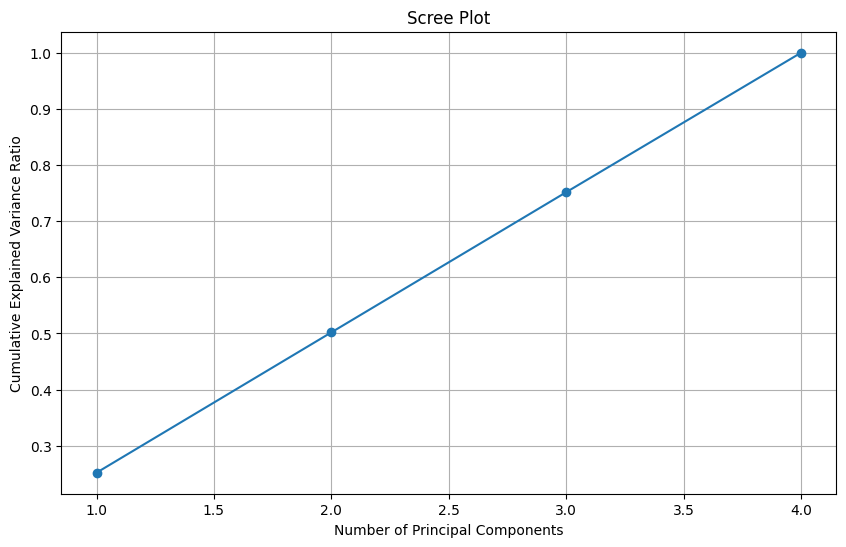

In [127]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

**8 out of 9 principal components (PCs) capture approximately 98% of the variance of the data. Therefore, I will select 8 PCs for further analysis.**

In [128]:
pca = PCA(n_components=8)  # Select 8 principal components

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=4 with svd_solver='covariance_eigh'

In [ ]:
X_train_pca.shape, X_test_pca.shape

((70000, 8), (30000, 8))

In [ ]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)
df_train

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.504100,0.504041,0.504100,0.502468,8.944818
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,3.820117
2,KNeighborsClassifier,0.688157,0.688157,0.688157,0.688157,2.678202
3,GaussianNB,0.505600,0.505607,0.505600,0.501428,0.109698
4,AdaBoostClassifier,0.517357,0.518133,0.517357,0.510504,5.871627
5,GradientBoostingClassifier,0.539629,0.540417,0.539629,0.536908,21.214955
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,13.480596
7,XGBClassifier,0.655871,0.656014,0.655871,0.655770,5.292027
8,SVC,0.522286,0.522553,0.522286,0.520140,882.968847


In [ ]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data using X_test_pca
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a DataFrame for the test data results
df_test = pd.DataFrame(results_test)
df_test

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.503667,0.503184,0.503667,0.502102
1,DecisionTreeClassifier,0.495833,0.495833,0.495833,0.495833
2,KNeighborsClassifier,0.496733,0.496756,0.496733,0.496742
3,GaussianNB,0.503667,0.502901,0.503667,0.499713
4,AdaBoostClassifier,0.506067,0.505211,0.506067,0.499374
5,GradientBoostingClassifier,0.500200,0.499450,0.500200,0.497172
6,RandomForestClassifier,0.497533,0.497356,0.497533,0.497298
7,XGBClassifier,0.497900,0.497803,0.497900,0.497807
8,SVC,0.502667,0.502032,0.502667,0.500129


**There's no significant improvement in performance with PCA.**

**`Final Model:` XGBClassifier is the best-performing algorithm on both the training and test data, using 9 variables, 4 variables, or PCA. It has the highest accuracy, precision, recall, and F1-score on all three. Therefore, I will build the final model using XGBoost Classifier using 9 variables.**

# `Final Model: XGBoost Using 9 variables`

In [129]:
x = df_cleaned.drop("Churn",axis=1)
y = df_cleaned['Churn']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [131]:
X_train.shape, X_test.shape

((70000, 4), (30000, 4))

In [132]:
X_train.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'], dtype='object')

In [133]:
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

# Train (fit) the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

results

,Metric,Train,Test
0,Accuracy,0.664929,0.500500
1,Precision,0.668665,0.495329
2,Recall,0.651227,0.489224
3,F1-Score,0.659831,0.492258


# `Hyperparameter Tunning`

Hyperparameters are settings in machine learning algorithms that control how the algorithm works. They are like the knobs and dials on a machine, and they can be adjusted to improve the performance of the algorithm.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

In [ ]:
# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

**According to the problem statement, false negatives are more important to reduce. Therefore, I selected recall as a metric to focus on.**

In [ ]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Recall with Best Model: 0.46619073275862066


**After hyperparameter tuning, the performance of the model did not improve. Hence, I choose XGBoost CLassifier without hyperparameter tunning and perform cross-validation on it.**

# `Cross Validation`

* Cross-validation is a technique used to evaluate the performance of a machine learning model. It works by dividing the data into several parts, called folds. The model is then trained on a subset of the data and tested on the remaining folds. This process is repeated several times, and the results are averaged to get an estimate of the model's performance.


* Cross-validation is necessary because it helps us avoid overfitting the model to the training data.


* Cross-validation is a way to make sure that our model is not just memorizing the training data, but that it is actually learning to make accurate predictions on new data.

In [ ]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.49692857 0.50057143 0.49892857 0.50478571 0.505     ]

Mean Accuracy Score: 0.5012428571428571


In [ ]:
#cross validation of recall

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.48990983 0.49398798 0.48869167 0.50171772 0.49427426]

Mean Recall Score: 0.4937162923036775


# `Finding Optimal Threshold`

In [ ]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = xgb_classifier.predict_proba(X_train)

predicted_labels = xgb_classifier.predict(X_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
43364,0.474755,1,0
52617,0.490060,1,0
83194,0.420003,0,0
79395,0.481040,0,0
78962,0.469605,0,0
32846,0.477571,0,0
88132,0.498932,1,0
22788,0.528793,0,1
63261,0.456429,0,0
48217,0.518680,0,1


In [ ]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

,Probability,Accuracy,Precision,Recall,F1 Score
0,0.1,0.499214,0.499114,1.000000,0.665879
1,0.2,0.501929,0.500473,1.000000,0.667087
2,0.3,0.514757,0.506998,0.999714,0.672793
3,0.4,0.569243,0.537409,0.982508,0.694786
4,0.5,0.664929,0.668665,0.651227,0.659831
5,0.6,0.569614,0.888422,0.157281,0.267250
6,0.7,0.517100,0.986207,0.032750,0.063395
7,0.8,0.504286,1.000000,0.006613,0.013139
8,0.9,0.501371,1.000000,0.000773,0.001545
9,1.0,0.500986,1.000000,0.000000,0.000000


## `Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)`

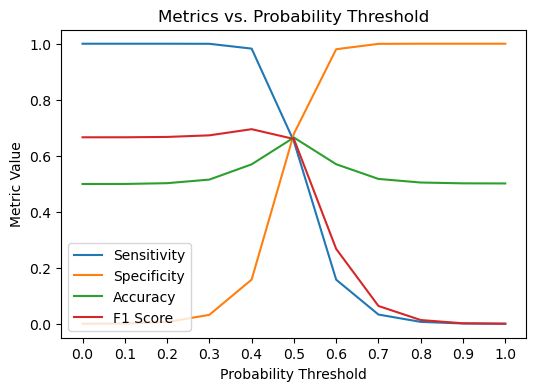

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

**The graph indicates that 0.5 is the best threshold point, where accuracy, sensitivity, specificity, and F1 score are all stable.**

# `Model Evaulation (XG Boost)`

## `Train & Test Data Metrics`

In [ ]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.664929,0.665030,0.664902,0.664853
1,Test,0.500500,0.500387,0.500387,0.500368


## `Confusion Matrix`

Confusion matrix is a table that is used to evaluate the performance of a machine learning model. It shows how many instances were correctly classified as positive (true positives), incorrectly classified as positive (false positives), correctly classified as negative (true negatives), and incorrectly classified as negative (false negatives).

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),33.995714,25.836667
True Negative (%),16.102857,24.670000
False Positive (%),17.404286,25.280000
False Negative (%),32.497143,24.213333


## `ROC-AUC Curve`

ROC-AUC curve, or Receiver Operating Characteristic-Area Under Curve, is a graph used in machine learning to measure the performance of a binary classifier. It plots the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.

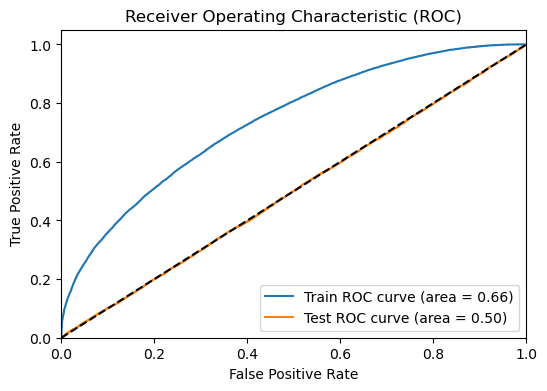

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# `Important Features in Model Building`

In [ ]:
feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.316383
1,Total_Usage_GB,0.290353
2,Age,0.194396
3,Subscription_Length_Months,0.142624
4,Gender_Male,0.016683
5,Location_Los Angeles,0.010595
6,Location_Houston,0.010007
7,Location_Miami,0.009792
8,Location_New York,0.009166


**The four variables ['Monthly_Bill', 'Total_Usage_GB', 'Age', and 'Subscription_Length_Months'] are the most important variables in the analysis because they contain 94% of the feature importance or information gain in predicting whether a customer will churn or not.**

# `Save model in a pickle file`

In [ ]:
import joblib


joblib.dump(xgb_classifier, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']

# `Outcome`

**This customer churn prediction project aims to build a machine learning model that forecasts the likelihood of customer churn based on attributes such as age, gender, location, subscription duration, monthly bill, and total usage. The model helps identify customers at higher risk of leaving, allowing the business to implement proactive strategies for retention. By leveraging these predictions, the company can optimize resource allocation, tailor engagement approaches, and execute targeted retention initiatives. The success of this project is evaluated by the model’s accuracy in predicting churn, leading to reduced churn rates, enhanced customer satisfaction, and improved retention strategies**